In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("E:\Full Stack Data Scientist Bootcamp\Supervised ML resources/letterdata.csv")
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
x=np.array(df)[:,1:]
y=np.array(df.letter)[:]

In [8]:
x

array([[2, 8, 3, ..., 8, 0, 8],
       [5, 12, 3, ..., 8, 4, 10],
       [4, 11, 6, ..., 7, 3, 9],
       ...,
       [6, 9, 6, ..., 12, 2, 4],
       [2, 3, 4, ..., 9, 5, 8],
       [4, 9, 6, ..., 7, 2, 8]], dtype=object)

In [9]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [10]:
x_train=x[0:16000,0:17]
x_test=x[16001:,:]
y_train=y[:16000]
y_test=y[16001:]

In [11]:
x_train

array([[2, 8, 3, ..., 8, 0, 8],
       [5, 12, 3, ..., 8, 4, 10],
       [4, 11, 6, ..., 7, 3, 9],
       ...,
       [8, 14, 7, ..., 7, 5, 8],
       [4, 7, 5, ..., 8, 5, 8],
       [2, 1, 3, ..., 9, 4, 10]], dtype=object)

### Build SVM Model

In [13]:
from sklearn import svm
model=svm.SVC(C=3)


In [14]:
model.fit(x_train,y_train)

SVC(C=3)

In [16]:
y_pred=model.predict(x_test)
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [18]:
model.score(x_test,y_test)

0.9472368092023006

In [21]:
y_grid=np.column_stack([y_test,y_pred])
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [46]:
import string
lab=list(string.ascii_uppercase[0:26])

plab=['predicted ' + s for s in lab ]
#lab=['original ' + s for s in lab ]

In [47]:
plab

['predicted A',
 'predicted B',
 'predicted C',
 'predicted D',
 'predicted E',
 'predicted F',
 'predicted G',
 'predicted H',
 'predicted I',
 'predicted J',
 'predicted K',
 'predicted L',
 'predicted M',
 'predicted N',
 'predicted O',
 'predicted P',
 'predicted Q',
 'predicted R',
 'predicted S',
 'predicted T',
 'predicted U',
 'predicted V',
 'predicted W',
 'predicted X',
 'predicted Y',
 'predicted Z']

In [48]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

<AxesSubplot:>

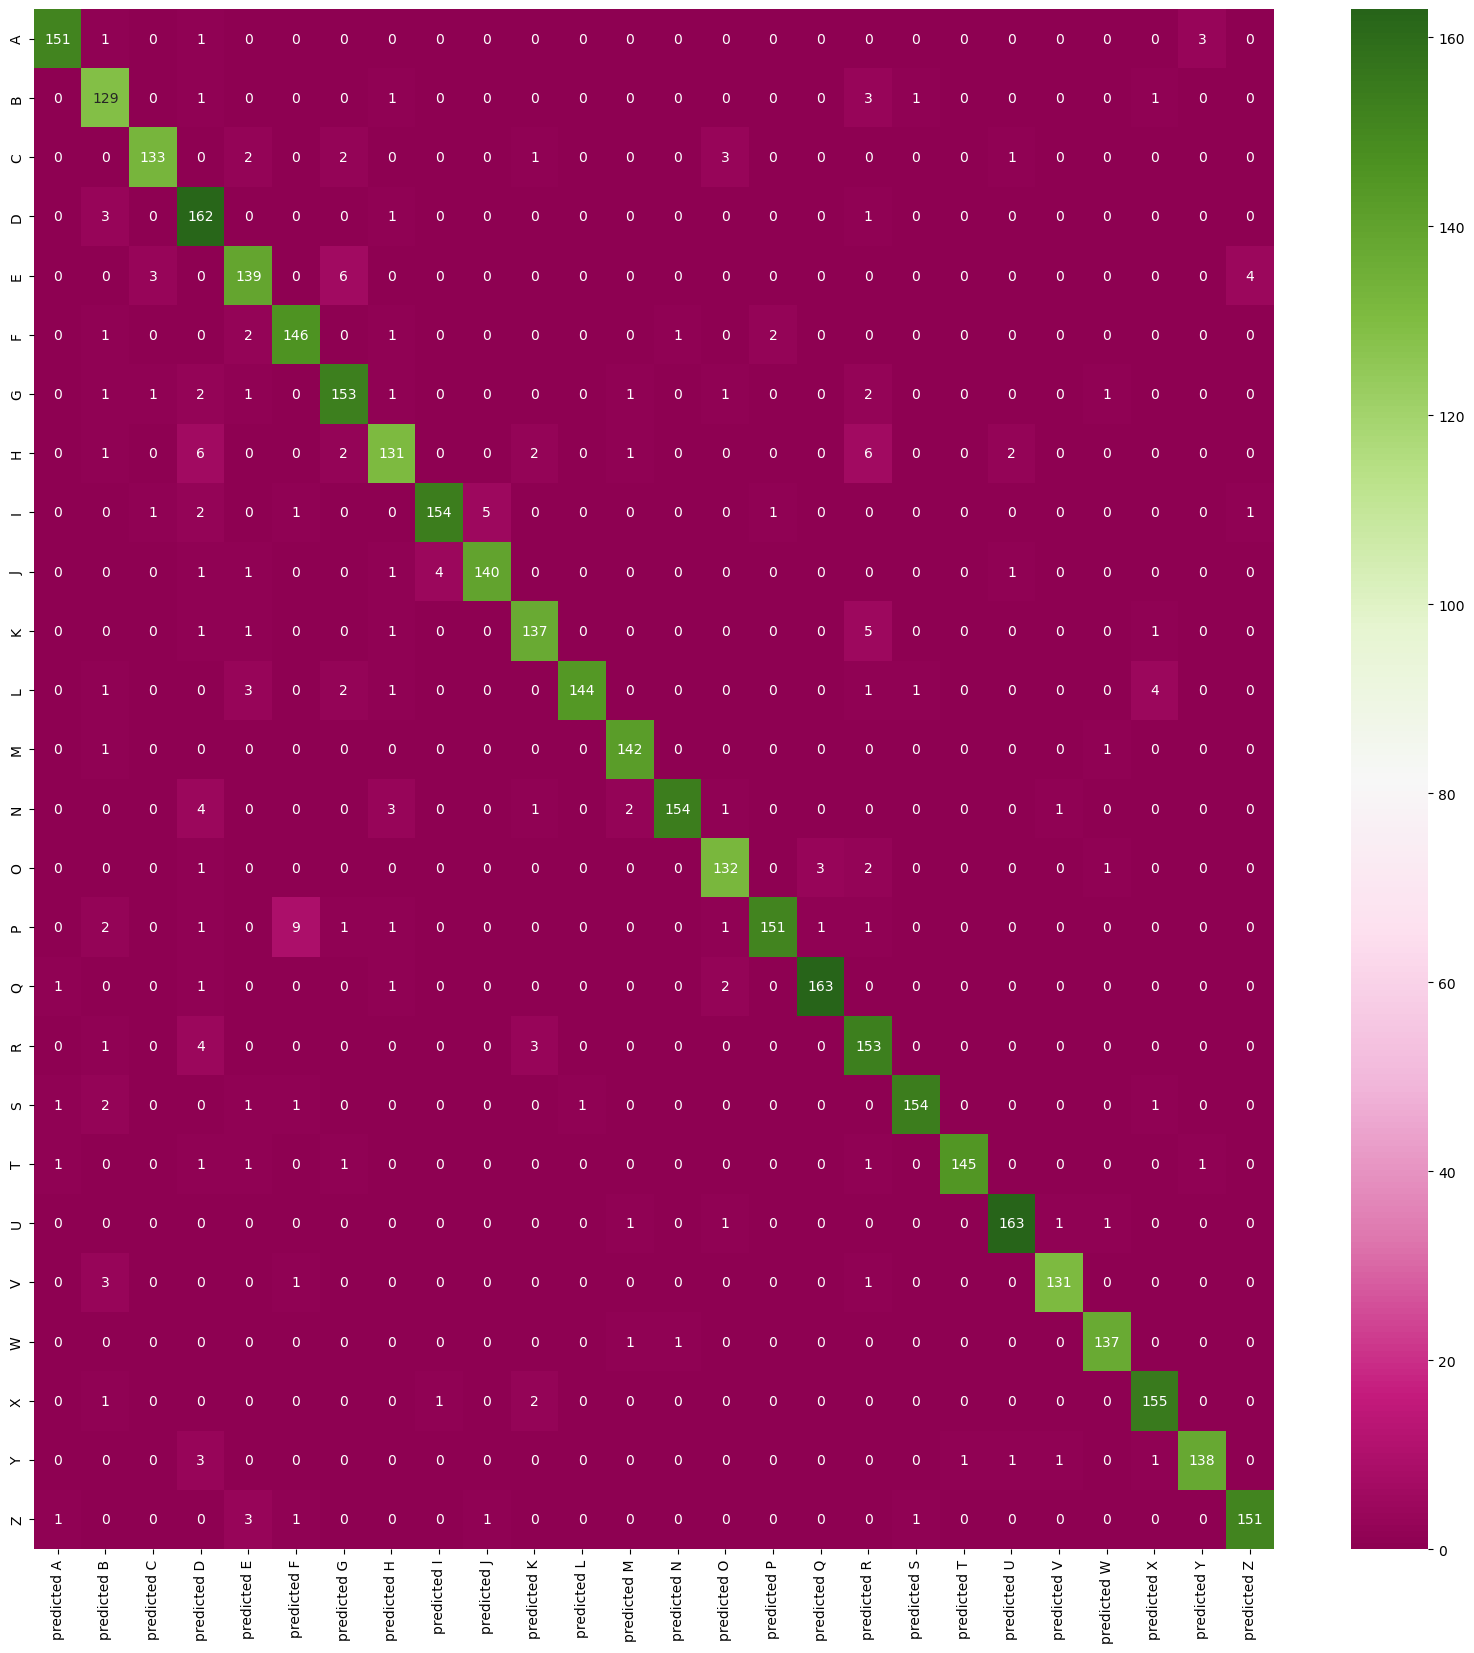

In [49]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred,labels=lab)

df_cm=pd.DataFrame(cm, index=[i for i in lab], columns=[i for i in plab])

plt.figure(figsize=(20,20))
sb.heatmap(df_cm,annot=True,fmt='g',cmap='PiYG')